📥 Loading and preparing data...
✅ Data loaded successfully! 67816 Data Analyst jobs in US found.

🏙️  Analyzing job locations...


C:\Users\New Star Computer 25\AppData\Local\Temp\ipykernel_25748\1145864436.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='count', y='job_location',


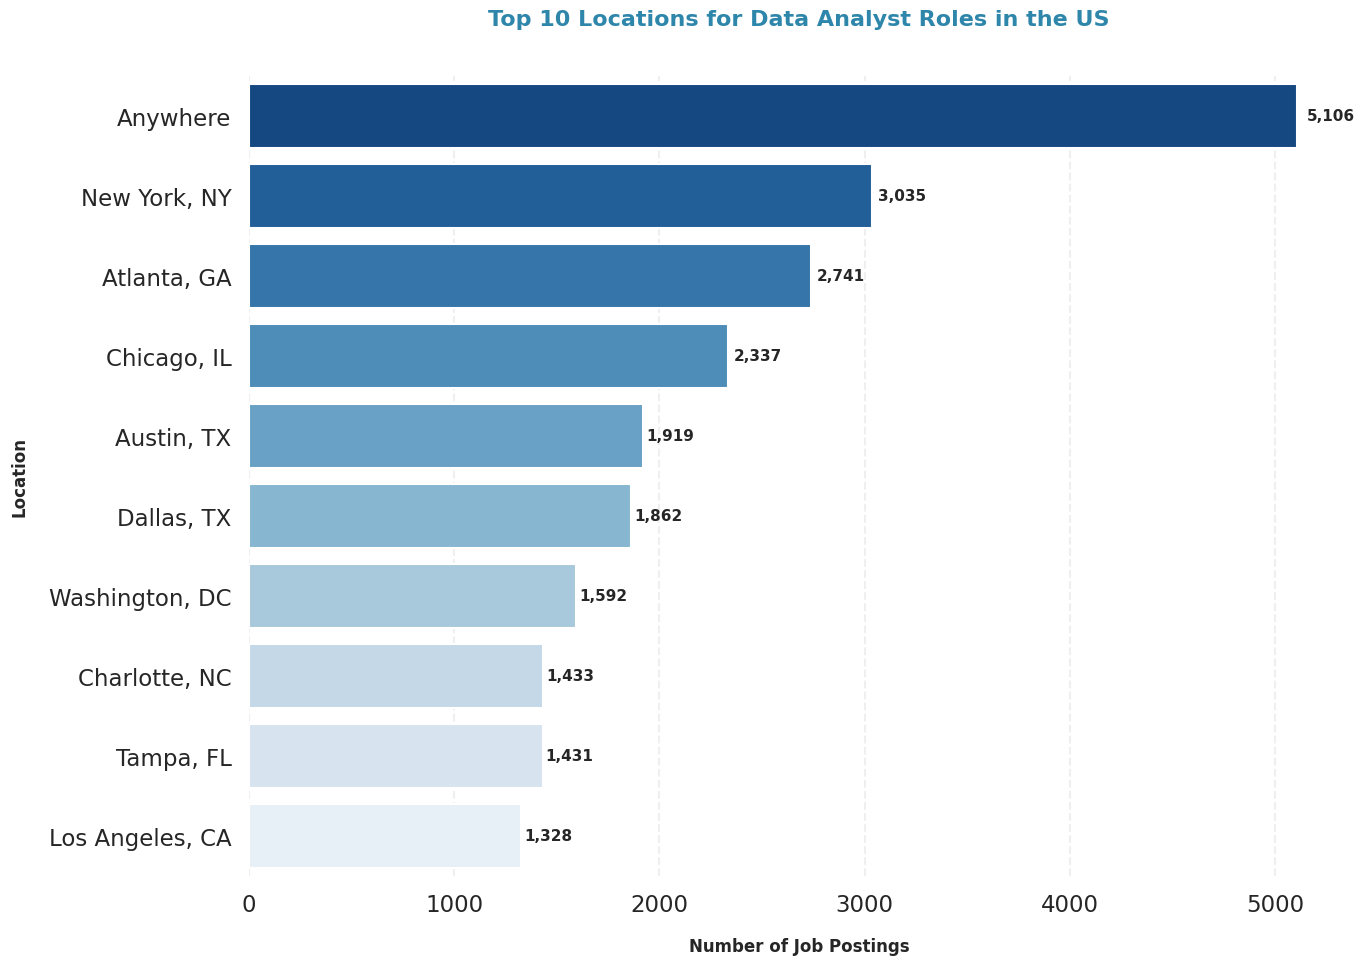


💼 Analyzing job benefits and opportunities...


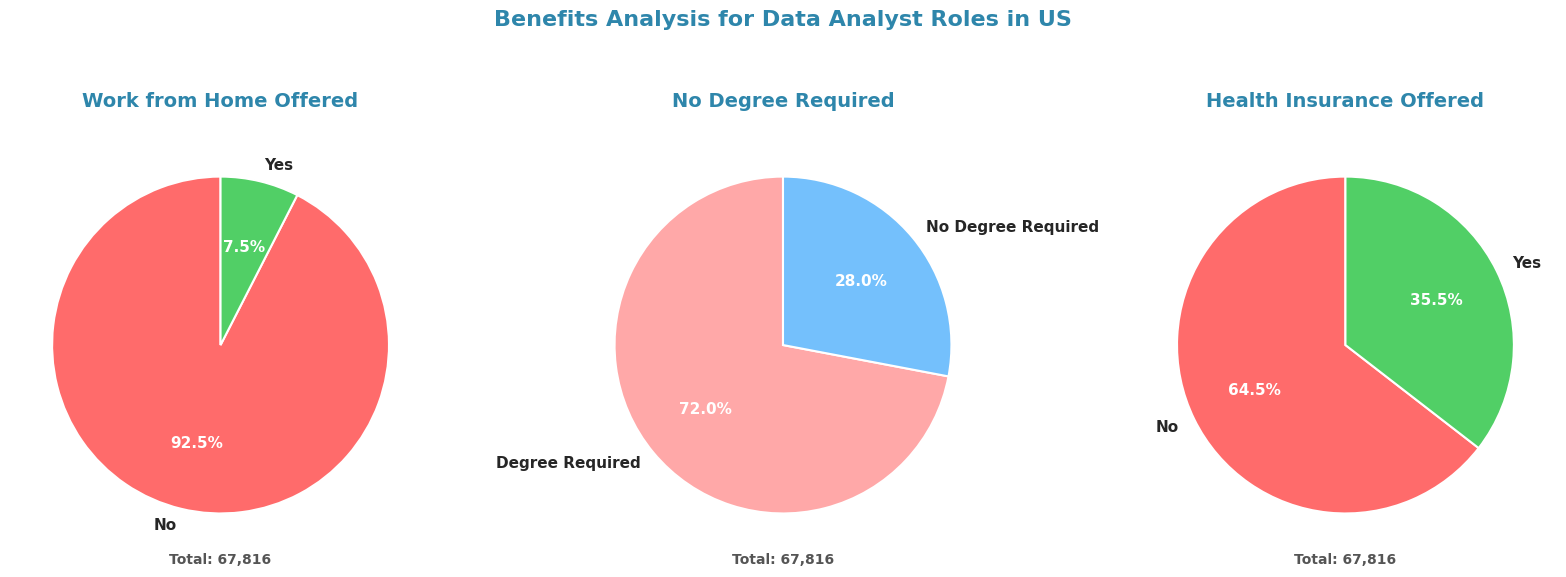


🏢 Analyzing top companies...


C:\Users\New Star Computer 25\AppData\Local\Temp\ipykernel_25748\1145864436.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='count', y='company_name',


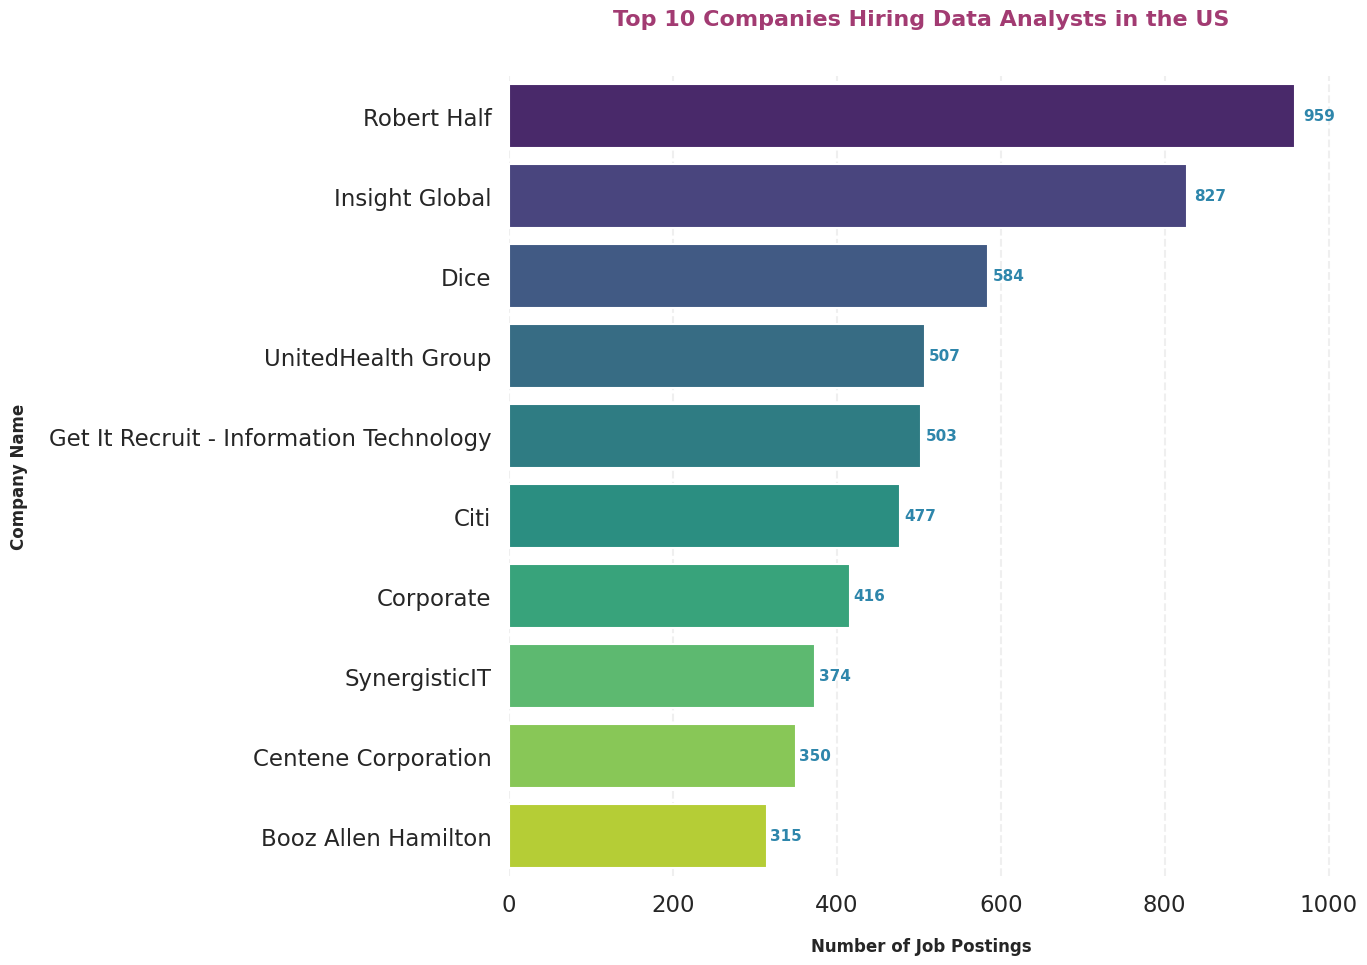


💰 Checking for salary data...
Found salary columns: ['salary_rate', 'salary_year_avg', 'salary_hour_avg']


C:\Users\New Star Computer 25\AppData\Local\Temp\ipykernel_25748\1145864436.py:180: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_by_location.values, y=salary_by_location.index,


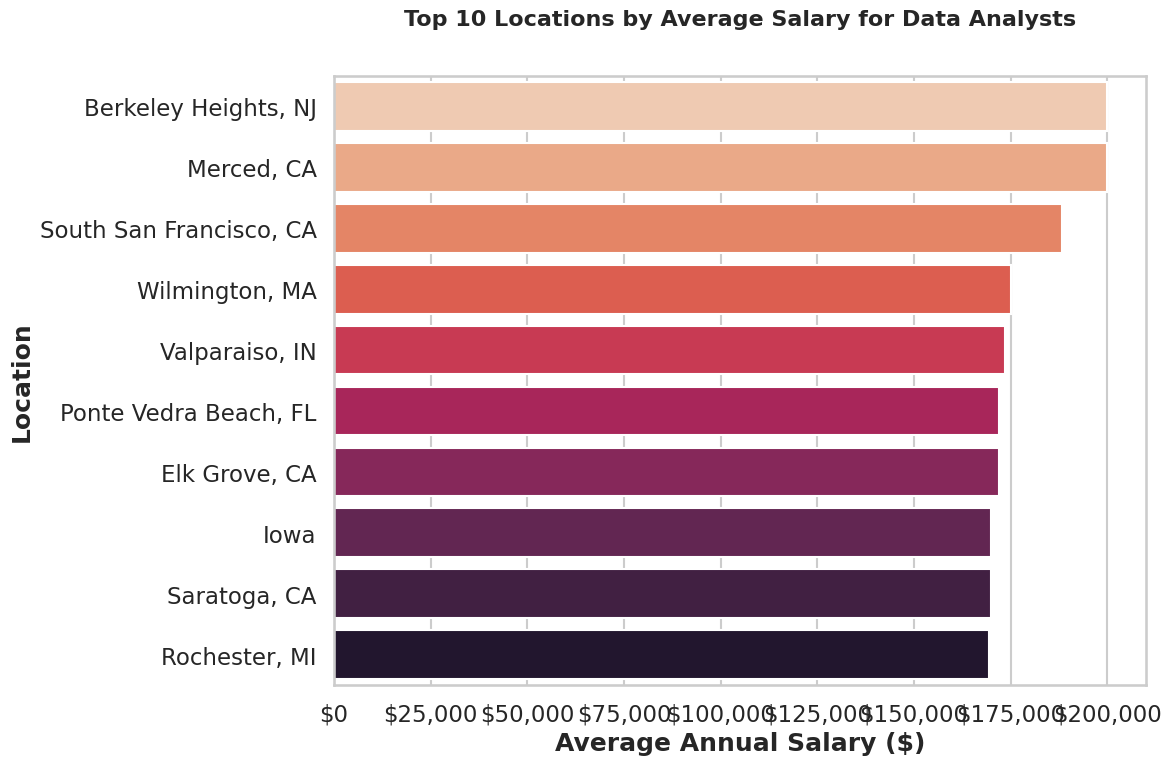


📊 SUMMARY STATISTICS - DATA ANALYST ROLES IN US
📈 Total Data Analyst Jobs in US: 67,816
🏙️  Unique Locations: 3220
🏢 Unique Companies: 17724
🏠 Work from Home Opportunities: 5,106 (7.5%)
🎓 No Degree Required: 18,976 (28.0%)
🏥 Health Insurance Offered: 24,061 (35.5%)
📅 Date Range: 2023-01-01 to 2023-12-31


In [3]:
# =============================================================================
# ENHANCED EXPLORATORY DATA ANALYSIS FOR DATA ANALYSTS IN THE US
# =============================================================================

import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
import numpy as np

# Set global style for all plots
plt.style.use('default')
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.facecolor'] = 'white'

# Color palettes
COLOR_PALETTE = ["#2E86AB", "#A23B72", "#F18F01", "#C73E1D", "#3A7CA5"]
SEQUENTIAL_PALETTE = "Blues_r"
DIVERGING_PALETTE = "vlag"

# =============================================================================
# DATA LOADING AND CLEANUP
# =============================================================================

print("📥 Loading and preparing data...")

# Specify the file format explicitly
dataset = load_dataset('csv', data_files='D:/Udemy/Luke/Python for Data Analytics/DataSets/data_jobs.csv')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for US Data Analyst roles
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

print(f"✅ Data loaded successfully! {len(df_DA_US)} Data Analyst jobs in US found.")

# =============================================================================
# 1. ENHANCED LOCATIONS ANALYSIS
# =============================================================================

print("\n🏙️  Analyzing job locations...")

plt.figure(figsize=(14, 10))

# Prepare data
df_plot = df_DA_US['job_location'].value_counts().head(10).reset_index()
df_plot.columns = ['job_location', 'count']

# Create enhanced barplot
ax = sns.barplot(data=df_plot, x='count', y='job_location', 
                 palette=SEQUENTIAL_PALETTE, saturation=0.8)

# Add value annotations
for i, (value, patch) in enumerate(zip(df_plot['count'], ax.patches)):
    ax.text(value + value * 0.01, patch.get_y() + patch.get_height()/2, 
            f'{value:,}', va='center', ha='left', fontweight='bold', fontsize=11)

# Enhanced styling
plt.title('Top 10 Locations for Data Analyst Roles in the US\n', 
          fontsize=16, fontweight='bold', pad=20, color='#2E86AB')
plt.xlabel('Number of Job Postings', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Location', fontsize=12, fontweight='bold', labelpad=15)

# Improve grid and spines
plt.grid(axis='x', alpha=0.3, linestyle='--')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# =============================================================================
# 2. ENHANCED JOB OPPORTUNITIES/BENEFITS ANALYSIS
# =============================================================================

print("\n💼 Analyzing job benefits and opportunities...")

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'No Degree Required',
    'job_health_insurance': 'Health Insurance Offered'
}

# Create enhanced pie charts
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for i, (column, title) in enumerate(dict_column.items()):
    # Get value counts
    value_counts = df_DA_US[column].value_counts()
    labels = ['No', 'Yes'] if column != 'job_no_degree_mention' else ['Degree Required', 'No Degree Required']
    
    # Define colors - green for positive, light gray for negative
    colors = ['#FF6B6B', '#51CF66'] if column != 'job_no_degree_mention' else ['#FFA8A8', '#74C0FC']
    
    # Create pie chart with enhancements
    wedges, texts, autotexts = axes[i].pie(value_counts, 
                                           labels=labels, 
                                           colors=colors,
                                           autopct='%1.1f%%', 
                                           startangle=90,
                                           textprops={'fontsize': 11, 'fontweight': 'bold'})
    
    # Enhance autopct text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    # Add count information
    axes[i].text(0, -1.3, f'Total: {value_counts.sum():,}', 
                ha='center', fontweight='bold', fontsize=10, color='#555')
    
    axes[i].set_title(title, fontsize=14, fontweight='bold', pad=20, color='#2E86AB')

plt.suptitle('Benefits Analysis for Data Analyst Roles in US', 
             fontsize=16, fontweight='bold', y=1.02, color='#2E86AB')
plt.tight_layout()
plt.show()

# =============================================================================
# 3. ENHANCED COMPANIES ANALYSIS
# =============================================================================

print("\n🏢 Analyzing top companies...")

plt.figure(figsize=(14, 10))

# Prepare data
df_plot = df_DA_US['company_name'].value_counts().head(10).reset_index()
df_plot.columns = ['company_name', 'count']

# Create enhanced barplot with different palette
ax = sns.barplot(data=df_plot, x='count', y='company_name', 
                 palette="viridis", saturation=0.8)

# Add value annotations with improved positioning
for i, (value, patch) in enumerate(zip(df_plot['count'], ax.patches)):
    ax.text(value + value * 0.01, patch.get_y() + patch.get_height()/2, 
            f'{value:,}', va='center', ha='left', 
            fontweight='bold', fontsize=11, color='#2E86AB')

# Enhanced styling
plt.title('Top 10 Companies Hiring Data Analysts in the US\n', 
          fontsize=16, fontweight='bold', pad=20, color='#A23B72')
plt.xlabel('Number of Job Postings', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Company Name', fontsize=12, fontweight='bold', labelpad=15)

# Customize appearance
plt.grid(axis='x', alpha=0.3, linestyle='--')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# =============================================================================
# 4. BONUS: SALARY ANALYSIS (IF SALARY DATA EXISTS)
# =============================================================================

print("\n💰 Checking for salary data...")

# Check if salary columns exist
salary_columns = [col for col in df_DA_US.columns if 'salary' in col.lower()]
if salary_columns:
    print(f"Found salary columns: {salary_columns}")
    
    # Example for salary analysis (adapt based on your actual column names)
    if 'salary_year_avg' in df_DA_US.columns and df_DA_US['salary_year_avg'].notna().sum() > 0:
        plt.figure(figsize=(12, 8))
        
        # Filter out null salaries and get top 10 locations with highest average salaries
        salary_by_location = (df_DA_US[df_DA_US['salary_year_avg'].notna()]
                            .groupby('job_location')['salary_year_avg']
                            .mean()
                            .sort_values(ascending=False)
                            .head(10))
        
        sns.barplot(x=salary_by_location.values, y=salary_by_location.index, 
                   palette="rocket_r", saturation=0.8)
        
        plt.title('Top 10 Locations by Average Salary for Data Analysts\n', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Average Annual Salary ($)', fontweight='bold')
        plt.ylabel('Location', fontweight='bold')
        
        # Format x-axis as currency
        plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
        
        plt.tight_layout()
        plt.show()

# =============================================================================
# 5. SUMMARY STATISTICS
# =============================================================================

print("\n" + "="*60)
print("📊 SUMMARY STATISTICS - DATA ANALYST ROLES IN US")
print("="*60)

print(f"📈 Total Data Analyst Jobs in US: {len(df_DA_US):,}")
print(f"🏙️  Unique Locations: {df_DA_US['job_location'].nunique()}")
print(f"🏢 Unique Companies: {df_DA_US['company_name'].nunique()}")

# Benefits summary
print(f"🏠 Work from Home Opportunities: {df_DA_US['job_work_from_home'].sum():,} ({df_DA_US['job_work_from_home'].mean()*100:.1f}%)")
print(f"🎓 No Degree Required: {df_DA_US['job_no_degree_mention'].sum():,} ({df_DA_US['job_no_degree_mention'].mean()*100:.1f}%)")
print(f"🏥 Health Insurance Offered: {df_DA_US['job_health_insurance'].sum():,} ({df_DA_US['job_health_insurance'].mean()*100:.1f}%)")

# Date range if available
if 'job_posted_date' in df_DA_US.columns:
    print(f"📅 Date Range: {df_DA_US['job_posted_date'].min().strftime('%Y-%m-%d')} to {df_DA_US['job_posted_date'].max().strftime('%Y-%m-%d')}")

print("="*60)